In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('/home/rwu/cargospace/correlation/merged_data.txt',sep = '\t')
df

,Protein.name,X0QJ6J2T_sample001,X128T8B4_sample001,X128T8B4_sample002,X128T8B4_sample003,X128T8B4_sample004,X128T8B4_sample005,X128T8B4_sample006,X128T8B4_sample007,X128T8B4_sample008,...,Z9UVZX7_sample002,Z9UVZX7_sample003,Z9UVZX7_sample004,ZF8WDFS_sample001,ZF8WDFS_sample002,ZF8WDFS_sample003,ZF8WDFS_sample004,ZF8WDFS_sample005,ZF8WDFS_sample006,ZF8WDFS_sample007
0,AHR_AHR_HUMAN.H11MO.0.B,-0.996537,0.007960,0.068147,0.002508,-0.083380,0.005810,-0.023115,0.230982,0.212469,...,0.222892,0.291067,-0.188559,0.062874,0.213513,-0.076498,0.017967,0.078863,-0.054800,-0.045441
1,AIRE_AIRE_HUMAN.H11MO.0.C,-0.988080,0.014104,-0.039634,-0.045459,-0.036980,0.006550,0.088659,-0.031724,-0.003028,...,0.356030,0.388263,-0.024218,0.132949,-0.090043,0.339269,-0.081026,0.184430,0.031550,0.079970
2,ALX1_ALX1_HUMAN.H11MO.0.B,NaN,0.023652,-0.026301,-0.063221,0.140324,0.121153,0.005472,0.027363,-0.052919,...,0.148214,-0.031070,0.126211,0.298077,-0.073887,-0.204610,-0.024929,0.140210,0.538731,0.421912
3,ANDR_ANDR_HUMAN.H11MO.0.A,-0.663109,0.008396,0.011710,0.020090,0.029519,0.047061,0.060707,0.052545,0.049214,...,0.132557,0.236388,-0.004911,0.165251,0.105785,0.129319,-0.007571,-0.024693,0.033046,-0.066581
4,AP2A_AP2A_HUMAN.H11MO.0.A,-0.839229,0.010268,-0.017685,0.021315,-0.000741,-0.016297,0.008459,0.014631,0.040052,...,0.125650,0.298635,-0.095807,0.060381,0.060314,-0.027176,-0.087268,0.044571,0.062313,-0.081132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,ZSCAN29_MA1602.1,NaN,-0.078523,-0.082826,-0.076017,-0.046182,-0.061368,-0.031920,0.010853,-0.090677,...,0.076140,0.076349,-0.305270,-0.132521,-0.084876,-0.178059,-0.242727,-0.133234,0.053004,-0.304959
1356,ZSCAN30_M08365_2.00,-0.664181,0.037498,0.009026,0.009683,0.047775,-0.014218,0.018549,-0.002789,0.014454,...,0.087690,0.207579,-0.193768,0.045001,0.102556,0.085843,-0.066110,-0.004350,-0.018050,-0.139994
1357,ZSCAN31_M08270_2.00,NaN,0.111434,-0.064372,0.026754,0.055774,0.042697,0.020293,0.063603,0.149112,...,0.018690,0.274143,0.107866,0.030190,0.163727,0.203562,0.410543,-0.060987,0.011768,-0.146254
1358,ZSCAN31_M08393_2.00,-0.970619,0.017389,-0.035222,0.004859,0.036464,-0.019055,0.122337,0.083725,0.062902,...,0.044318,0.079924,-0.154390,0.032722,-0.060063,-0.059652,-0.185068,0.044118,0.089100,-0.256434


In [29]:
df.index = df['Protein.name']
df = df.drop('Protein.name',axis = 1)

In [35]:
df.T.min().max()

-0.258197088277817

In [32]:
df.T.min()

Protein.name
AHR_AHR_HUMAN.H11MO.0.B     -0.996537
AIRE_AIRE_HUMAN.H11MO.0.C   -1.000000
ALX1_ALX1_HUMAN.H11MO.0.B   -1.000000
ANDR_ANDR_HUMAN.H11MO.0.A   -0.862958
AP2A_AP2A_HUMAN.H11MO.0.A   -0.906967
                               ...   
ZSCAN29_MA1602.1            -1.000000
ZSCAN30_M08365_2.00         -0.664181
ZSCAN31_M08270_2.00         -0.821041
ZSCAN31_M08393_2.00         -0.970619
ZSCAN5C_M08390_2.00         -0.999955
Length: 1360, dtype: float64

In [21]:
df.T.mean().sort_values(ascending=False)

Protein.name
ZNF564_M07770_2.00             0.189851
CDX2_CDX2_HUMAN.H11MO.0.A      0.156423
ZNF136_M08374_2.00             0.152071
HXA10_HXA10_HUMAN.H11MO.0.C    0.133897
SOX5_SOX5_HUMAN.H11MO.0.C      0.127777
                                 ...   
ELF1_M08198_2.00              -0.116947
CREB1_CREB1_HUMAN.H11MO.0.A   -0.124959
ATF3_ATF3_HUMAN.H11MO.0.A     -0.126598
TFEB_TFEB_HUMAN.H11MO.0.C     -0.129501
RFX1_MA0509.3                 -0.142226
Length: 1360, dtype: float64

In [298]:
df_array = df.iloc[:,1:].to_numpy()
ls = []
for i in range(len(df_array)):
    ls = ls + df_array[i].tolist()

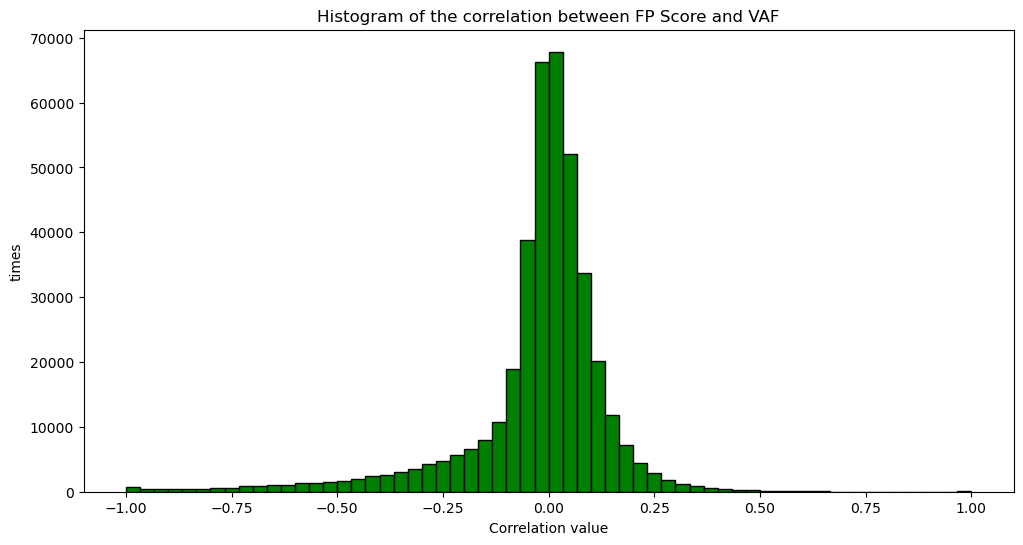

In [299]:
plt.figure(figsize=(12, 6))
plt.hist(ls, bins=60, color='green', edgecolor='black')

plt.title('Histogram of the correlation between FP Score and VAF')
plt.ylabel('times')
plt.xlabel('Correlation value')

plt.show()

In [300]:
df[df.iloc[:,1:] < -0.95]

,Protein.name,X0QJ6J2T_sample001,X128T8B4_sample001,X128T8B4_sample002,X128T8B4_sample003,X128T8B4_sample004,X128T8B4_sample005,X128T8B4_sample006,X128T8B4_sample007,X128T8B4_sample008,...,Z9UVZX7_sample002,Z9UVZX7_sample003,Z9UVZX7_sample004,ZF8WDFS_sample001,ZF8WDFS_sample002,ZF8WDFS_sample003,ZF8WDFS_sample004,ZF8WDFS_sample005,ZF8WDFS_sample006,ZF8WDFS_sample007
0,NaN,-0.996537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.988080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,NaN,-0.970619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
filtered_df = df[df.iloc[:,1:] < -0.65]
temp = {}
for i in range(len(filtered_df)):
    temp_df = filtered_df.iloc[i,:]
    cancer_name = temp_df.dropna(axis=0, how='any').index.tolist()
    if cancer_name == []:
        continue
    
    protein_name = df.iloc[i,:]['Protein.name']
    
    temp[protein_name] = cancer_name

In [319]:
len(temp)

1141

In [ ]:
temp

In [320]:
qwer=0
for sub in temp.values():
    qwer+=len(sub)
print(qwer)

6207


In [ ]:
i = 0
exist_cancer = []
for protein in temp.keys():

    print("----------------" + protein + "----------------")
    cancers = temp[protein]
    print(cancers)
    for cancer in cancers:
        if cancer in exist_cancer:
            print(cancer + "has been processed")
            continue
        else:
            exist_cancer.append(cancer)
        print("Processing: " + cancer)
        cancer_correlated_protein = [key for key, value in temp.items() if cancer in value]
        
        if cancer[0] == "X":
            cancer = cancer[1:]
        path = "/home/zlei/cargospace/merged_data1/" + cancer.split("_")[0] + ".txt"
        #print(path)
        df_cancer = pd.read_csv(path,sep='\t')
        df_cancer_protein = df_cancer[df_cancer['Protein name'].isin(cancer_correlated_protein)]
        df_cancer_protein.reset_index(drop=True, inplace=True)
        
        all_cancer_columns = [col for col in df_cancer_protein.columns if cancer.split("_")[0] in col]
        correlated_cancer_columns = [col for col in df_cancer_protein.columns if cancer in col]
        if all_cancer_columns != correlated_cancer_columns:
            additional_list = [element for element in all_cancer_columns if element not in correlated_cancer_columns]
            print("\n!!!!!Have additional columns!!!!!")
            print(additional_list)
            df_cancer_protein = df_cancer_protein.drop(additional_list,axis = 1)
        
        save_path = '/home/zlei/cargospace/cancer_protein/' + cancer + '.csv'
        
        if os.path.exists(save_path):
            os.remove(save_path)
        df_cancer_protein.to_csv(save_path)
    
    
    print("\n")
    # i += 1
    # if i >= 3:
    #     break

In [ ]:
i = 0
for protein in temp.keys():
    print("----------------" + protein + "----------------")
    cancers = temp[protein]
    print(cancers)
    new_protein = True
    
    for cancer in cancers:
        print("Processing: " + cancer)
        if cancer[0] == "X":
            cancer = cancer[1:]
            
        path = "/home/zlei/cargospace/merged_data1/" + cancer.split("_")[0] + ".txt"
        #print(path)
        df_cancer = pd.read_csv(path,sep='\t')
        df_cancer_temp = df_cancer[df_cancer['Protein name'] == protein]
        
        all_cancer_columns = [col for col in df_cancer_temp.columns if cancer.split("_")[0] in col]
        correlated_cancer_columns = [col for col in df_cancer_temp.columns if cancer in col]
        if all_cancer_columns != correlated_cancer_columns:
            additional_list = [element for element in all_cancer_columns if element not in correlated_cancer_columns]
            print("\n!!!!!Have additional columns!!!!!")
            print(additional_list)
            df_cancer_temp = df_cancer_temp.drop(additional_list,axis = 1)
        
        if new_protein == True:
            df_cancer_protein = df_cancer_temp
            df_cancer_protein['Cancer name'] = cancer
            rename_columns_fp = cancer + '_fp_score'
            rename_columns_vaf = cancer + '_VAF'
            df_cancer_protein.rename(columns={rename_columns_fp: 'fp_score',rename_columns_vaf:'VAF'}, inplace=True)
            new_protein = False
        else:
            df_cancer_temp['Cancer name'] = cancer
            rename_columns_fp = cancer + '_fp_score'
            rename_columns_vaf = cancer + '_VAF'
            df_cancer_temp.rename(columns={rename_columns_fp: 'fp_score',rename_columns_vaf:'VAF'}, inplace=True)
            df_cancer_protein = pd.concat([df_cancer_protein, df_cancer_temp],axis=0)
            
        df_cancer_protein.reset_index(drop=True, inplace=True)
        
        
        save_path = '/home/zlei/cargospace/protein_of_each_cancer/' + protein + '.csv'
        
        if os.path.exists(save_path):
            os.remove(save_path)
        df_cancer_protein.to_csv(save_path)
    
    
    # print("\n")
    # i += 1
    # if i >= 3:
    #     break

In [326]:
df_cancer_protein

,TFBS_chr,TFBS_start,TFBS_end,TFBS_strand,TFBS_score,fp_score,[2]POS,[3]REF,[4]ALT,VAF,Protein name,Cancer name
0,chr4,48254221,48254236,-,2.380844,0.118785,48254231,T,C,1.000000,ZSCAN5C_M08390_2.00,0QJ6J2T_sample001
1,chr10,11178815,11178830,-,2.211832,4.598663,11178824,A,G,0.479167,ZSCAN5C_M08390_2.00,0QJ6J2T_sample001
2,chr10,17748393,17748408,-,2.275620,0.077256,17748403,C,T,1.000000,ZSCAN5C_M08390_2.00,0QJ6J2T_sample001
3,chr4,165797755,165797770,-,2.163672,0.080735,165797765,C,T,1.000000,ZSCAN5C_M08390_2.00,0QJ6J2T_sample001
4,chr5,76003199,76003214,-,4.556183,0.068770,76003213,A,G,1.000000,ZSCAN5C_M08390_2.00,0QJ6J2T_sample001
...,...,...,...,...,...,...,...,...,...,...,...,...
255,chr8,18196964,18196979,+,4.789037,0.281019,18196970,G,A,0.428571,ZSCAN5C_M08390_2.00,O697I0L_sample001
256,chr8,138989260,138989275,-,3.149422,0.043541,138989270,C,G,1.000000,ZSCAN5C_M08390_2.00,O697I0L_sample001
257,chr9,134972182,134972197,+,2.101461,0.059817,134972191,G,C,1.000000,ZSCAN5C_M08390_2.00,O697I0L_sample001
258,chr3,64413658,64413673,+,2.403071,0.025521,64413662,G,T,1.000000,ZSCAN5C_M08390_2.00,O697I0L_sample001


In [ ]:
df_cancer_protein = pd.read_csv('/home/zlei/cargospace/merged_data.csv',index_col=0)
df_cancer_protein_VAF1 = df_cancer_protein[df_cancer_protein['VAF'] == 1.0]
for protein in set(df_cancer_protein_VAF1['Protein name']):
    print(protein)
    temp_df_VAF1 = df_cancer_protein_VAF1[df_cancer_protein_VAF1['Protein name'] == protein]
    save_path = '/home/zlei/cargospace/Protein_VAF1/' + protein + '.csv'
            
    if os.path.exists(save_path):
        os.remove(save_path)
    temp_df_VAF1.to_csv(save_path)

In [329]:
df_cancer_protein = pd.read_csv('/home/zlei/cargospace/merged_data.csv',index_col=0)
df_cancer_protein_VAF1 = df_cancer_protein[df_cancer_protein['VAF'] == 1.0]
for cancer in set(df_cancer_protein_VAF1['Cancer name']):
    #print(cancer)
    temp_df_VAF1 = df_cancer_protein_VAF1[df_cancer_protein_VAF1['Cancer name'] == cancer]
    save_path = '/home/zlei/cargospace/Cancer_VAF1/' + cancer + '.csv'
            
    if os.path.exists(save_path):
        os.remove(save_path)
    temp_df_VAF1.to_csv(save_path)

In [330]:
df_cancer_protein[df_cancer_protein['VAF'] == 1.0]

,TFBS_chr,TFBS_start,TFBS_end,TFBS_strand,TFBS_score,fp_score,[2]POS,[3]REF,[4]ALT,VAF,Protein name,Cancer name
0,chr2,3009679,3009688,-,1.932683,0.077031,3009684,G,T,1.0,AHR_AHR_HUMAN.H11MO.0.B,9M7H5EI_sample001
1,chr6,116462224,116462233,-,1.932683,0.214810,116462227,A,G,1.0,AHR_AHR_HUMAN.H11MO.0.B,9M7H5EI_sample001
2,chr16,87344781,87344790,-,2.861463,0.045475,87344782,G,C,1.0,AHR_AHR_HUMAN.H11MO.0.B,9M7H5EI_sample001
4,chr5,119404005,119404014,+,1.932683,0.031417,119404012,T,C,1.0,AHR_AHR_HUMAN.H11MO.0.B,9M7H5EI_sample001
5,chr21,38661109,38661118,-,2.861463,0.037438,38661111,C,G,1.0,AHR_AHR_HUMAN.H11MO.0.B,9M7H5EI_sample001
...,...,...,...,...,...,...,...,...,...,...,...,...
148933,chr1,95687022,95687029,+,-0.999997,0.040543,95687028,T,A,1.0,NF2L1_NF2L1_HUMAN.H11MO.0.C,ZF8WDFS_sample007
148935,chr1,49306779,49306786,+,-0.999997,0.031189,49306780,A,T,1.0,NF2L1_NF2L1_HUMAN.H11MO.0.C,ZF8WDFS_sample007
148936,chr1,84090222,84090229,+,-0.999997,0.023975,84090225,T,C,1.0,NF2L1_NF2L1_HUMAN.H11MO.0.C,ZF8WDFS_sample007
148938,chr1,94434123,94434130,-,-0.999997,0.041371,94434126,T,C,1.0,NF2L1_NF2L1_HUMAN.H11MO.0.C,ZF8WDFS_sample007


In [337]:
df_temp_VAF1 = pd.read_csv("/home/zlei/cargospace/merged_data.csv",index_col = 0)
df_temp_VAF1_1 = df_temp_VAF1[df_temp_VAF1['VAF'] == 1]
df_temp_VAF1_1.to_csv("/home/zlei/cargospace/merged_data_VAF1.csv")